In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import typing

# The Setup

There should only be one information set for each player, because they can always choose any number 0-49 afterwards.

In [69]:
# init params and storage
iterations = 3000
A = 30

Precomputing and Utility Calculations

In [70]:
def util_terminal(player_one: int, player_two: int, player_three: int) -> int:
    '''
    Gives the utility function of player one.

    Example: util_terminal(1, 2, 3) -> 1
    '''

    # All same
    if(player_one == player_two == player_three):
        # return 0, 0, 0
        return 0
    
    # two same
    if(player_one == player_two and player_two != player_three):
        # return 0, 0, 1
        return 0
    if(player_one == player_three and player_two != player_three):
        # return 0, 1, 0
        return 0
    if(player_three == player_two and player_two != player_one):
        # return 1, 0, 0
        return 1
    
    # all different
    min_score = min(player_one, player_two, player_three)
    if(player_one == min_score): 
        # return 1, 0, 0
        return 1
    if(player_two == min_score): 
        # return 0, 1, 0
        return 0
    if(player_three == min_score): 
        # return 0, 0, 1
        return 0

    # these should be all the cases but if not raise exception
    raise Exception(f"Something went wrong when trying to determine a winner. {player_one}, {player_two}, {player_three}.")    

util_matrix = np.zeros((A, A, A))

for i in range(A):
    for j in range(A):
        for k in range(A):
            util_matrix[i, j, k] = util_terminal(i, j, k)

def payoff_vector(strat: np.ndarray) -> np.ndarray:
    ''' 
    Calculates the payoff vector given two other opponents are playing the same strategy.
    '''
    second = strat.reshape(1, A, 1)
    third = strat.reshape(1, 1, A)
    return np.sum(util_matrix * second * third, axis=(1, 2))

$$u_i(\sigma, I) = \frac{\sum_{h \in I, h' \in Z} \pi_{-i}^{\sigma}(h) \pi_{i}^{\sigma}(h, h') u_i(h')}{\pi_{-i}^{\sigma}(I)}.$$
$$
R_i^T(I,a)
= \frac{1}{T}
  \sum_{t=1}^T
    \pi_{-i}^{\sigma^t}(I)\,
    \bigl(
      u_i\bigl(\sigma^t_{I\to a},I\bigr)
      - u_i(\sigma^t,I)
    \bigr).
$$
$$
\sigma_i^{T+1}(I)(a) \;=\;
\begin{cases}
\dfrac{R_i^{T,+}(I,a)}{\sum\limits_{a'\in A(I)} R_i^{T,+}(I,a')}
&\text{if } \displaystyle\sum_{a'\in A(I)} R_i^{T,+}(I,a') > 0, \\[1em]
\dfrac{1}{|A(I)|}
&\text{otherwise.}
\end{cases}
$$


In [74]:
strat = np.zeros(A)
strat[0] = 0.5346
strat[1] = 0.3434
strat[2] = 0.1139
strat[3] = 0.0082
cum_regret = np.zeros(A)
global_regret = []
strat_history = []

for iteration in range(0, iterations):
    strat_history.append(strat.copy())

    payoff = payoff_vector(strat)
    original_payoff = strat.dot(payoff)
    
    # technically we would dot payoff with a 1s matrix but that's like *= 1
    instant_regret = payoff - original_payoff
    cum_regret += instant_regret

    positive_regret = np.maximum(cum_regret, 0.0)
    normalizing = positive_regret.sum()
    if(normalizing > 0.0):
        strat = positive_regret/normalizing
    else:
        strat = np.full(A, 1.0/A)
    global_regret.append(normalizing)

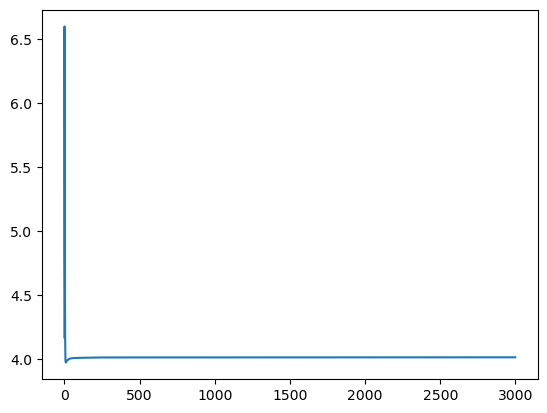

In [75]:
plt.plot(global_regret)

In [76]:
print(strat_history[-1])

[0.45631106 0.24809144 0.13488496 0.07333652 0.03987522 0.02168806
 0.01181454 0.00648339 0.00406857 0.00344626 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
